# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [20]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [21]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


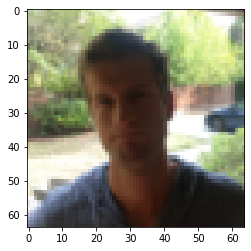

In [22]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

In [29]:
Y_train[10]

array([0], dtype=int64)

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [23]:
happy_model = Sequential()

## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
#happy_model.add(ZeroPadding2D(padding=(3,3), input_shape=(64,64,3)))

## Conv2D with 32 7x7 filters and stride of 1
happy_model.add(Conv2D(32, 7, strides=(1, 1), padding='valid'))
            
## BatchNormalization for axis 3
happy_model.add(BatchNormalization(axis = 3))

## Max Pooling 2D with default parameters
happy_model.add(MaxPooling2D())
            
## Flatten layer
happy_model.add(Flatten())

## Dense layer with 1 unit for output & 'sigmoid' activation
happy_model.add(Dense(units = 1, activation = 'sigmoid'))

happy_model.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [24]:
history_happy_model = happy_model.fit(X_train, Y_train, epochs=10, verbose=2,batch_size=10)

Epoch 1/10
60/60 - 12s - loss: 0.9000 - accuracy: 0.7867
Epoch 2/10
60/60 - 4s - loss: 0.3624 - accuracy: 0.8900
Epoch 3/10
60/60 - 4s - loss: 0.2804 - accuracy: 0.9017
Epoch 4/10
60/60 - 4s - loss: 0.1360 - accuracy: 0.9650
Epoch 5/10
60/60 - 4s - loss: 0.0827 - accuracy: 0.9767
Epoch 6/10
60/60 - 4s - loss: 0.2514 - accuracy: 0.9383
Epoch 7/10
60/60 - 4s - loss: 0.1651 - accuracy: 0.9483
Epoch 8/10
60/60 - 4s - loss: 0.1031 - accuracy: 0.9683
Epoch 9/10
60/60 - 4s - loss: 0.3210 - accuracy: 0.9250
Epoch 10/10
60/60 - 4s - loss: 0.1978 - accuracy: 0.9517


In [25]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (10, 58, 58, 32)          4736      
_________________________________________________________________
batch_normalization (BatchNo (10, 58, 58, 32)          128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (10, 29, 29, 32)          0         
_________________________________________________________________
flatten (Flatten)            (10, 26912)               0         
_________________________________________________________________
dense (Dense)                (10, 1)                   26913     
Total params: 31,777
Trainable params: 31,713
Non-trainable params: 64
_________________________________________________________________


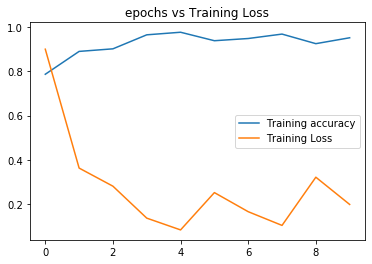

In [26]:
train_accuracy = history_happy_model.history['accuracy']
train_loss = history_happy_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [27]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 48ms/step - loss: 0.2001 - accuracy: 0.9467


[0.2001270055770874, 0.9466666579246521]

# using zeropadding2D optimizer

Epoch 1/10
60/60 - 8s - loss: 1.1544 - accuracy: 0.7767
Epoch 2/10
60/60 - 6s - loss: 0.3865 - accuracy: 0.8800
Epoch 3/10
60/60 - 7s - loss: 0.2104 - accuracy: 0.9367
Epoch 4/10
60/60 - 8s - loss: 0.2304 - accuracy: 0.9383
Epoch 5/10
60/60 - 6s - loss: 0.1982 - accuracy: 0.9500
Epoch 6/10
60/60 - 6s - loss: 0.0946 - accuracy: 0.9667
Epoch 7/10
60/60 - 7s - loss: 0.3167 - accuracy: 0.9217
Epoch 8/10
60/60 - 7s - loss: 0.1969 - accuracy: 0.9433
Epoch 9/10
60/60 - 8s - loss: 0.2004 - accuracy: 0.9533
Epoch 10/10
60/60 - 6s - loss: 0.1658 - accuracy: 0.9567
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1

[0.42508289217948914, 0.8999999761581421]

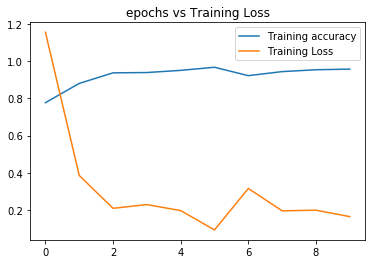

In [28]:
happy_model = Sequential()

## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
happy_model.add(ZeroPadding2D(padding=(3,3), input_shape=(64,64,3)))

## Conv2D with 32 7x7 filters and stride of 1
happy_model.add(Conv2D(32, 7, strides=(1, 1), padding='valid'))
            
## BatchNormalization for axis 3
happy_model.add(BatchNormalization(axis = 3))

## Max Pooling 2D with default parameters
happy_model.add(MaxPooling2D())
            
## Flatten layer
happy_model.add(Flatten())

## Dense layer with 1 unit for output & 'sigmoid' activation
happy_model.add(Dense(units = 1, activation = 'sigmoid'))

happy_model.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics=['accuracy'])

history_happy_model = happy_model.fit(X_train, Y_train, epochs=10, verbose=2,batch_size=10)

happy_model.summary()

train_accuracy = history_happy_model.history['accuracy']
train_loss = history_happy_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

happy_model.evaluate(X_test, Y_test)

# using rmsprop opt

###  BEST MODEL EVAL_ACC= 95%

Epoch 1/10
60/60 - 8s - loss: 3.5700 - accuracy: 0.6750
Epoch 2/10
60/60 - 6s - loss: 1.3530 - accuracy: 0.8233
Epoch 3/10
60/60 - 6s - loss: 1.0086 - accuracy: 0.8733
Epoch 4/10
60/60 - 6s - loss: 0.8178 - accuracy: 0.8900
Epoch 5/10
60/60 - 6s - loss: 0.8116 - accuracy: 0.8850
Epoch 6/10
60/60 - 6s - loss: 0.3993 - accuracy: 0.9317
Epoch 7/10
60/60 - 6s - loss: 0.4601 - accuracy: 0.9417
Epoch 8/10
60/60 - 8s - loss: 0.4359 - accuracy: 0.9550
Epoch 9/10
60/60 - 8s - loss: 0.4324 - accuracy: 0.9467
Epoch 10/10
60/60 - 7s - loss: 0.3340 - accuracy: 0.9567
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2

[0.21233928203582764, 0.9733333587646484]

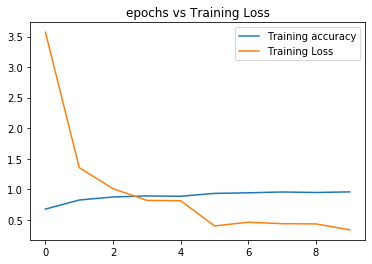

In [30]:
happy_model = Sequential()

## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
happy_model.add(ZeroPadding2D(padding=(3,3), input_shape=(64,64,3)))

## Conv2D with 32 7x7 filters and stride of 1
happy_model.add(Conv2D(32, 7, strides=(1, 1), padding='valid'))
            
## BatchNormalization for axis 3
happy_model.add(BatchNormalization(axis = 3))

## Max Pooling 2D with default parameters
happy_model.add(MaxPooling2D())
            
## Flatten layer
happy_model.add(Flatten())

## Dense layer with 1 unit for output & 'sigmoid' activation
happy_model.add(Dense(units = 1, activation = 'sigmoid'))

happy_model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy',metrics=['accuracy'])

history_happy_model = happy_model.fit(X_train, Y_train, epochs=10, verbose=2,batch_size=10)

happy_model.summary()

train_accuracy = history_happy_model.history['accuracy']
train_loss = history_happy_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

happy_model.evaluate(X_test, Y_test)

# other

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=["accuracy"])

In [9]:
history_model = model.fit(X_train, Y_train, epochs=5, verbose=2,batch_size=1)

Epoch 1/5
600/600 - 63s - loss: 0.8153 - accuracy: 0.5333
Epoch 2/5
600/600 - 59s - loss: 0.4663 - accuracy: 0.8183
Epoch 3/5
600/600 - 69s - loss: 0.3028 - accuracy: 0.9083
Epoch 4/5
600/600 - 77s - loss: 0.2315 - accuracy: 0.9333
Epoch 5/5
600/600 - 80s - loss: 0.1900 - accuracy: 0.9467


# Evaluate / Test

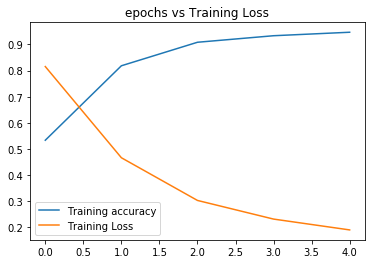

In [10]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [11]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 13s 169ms/step - loss: 0.3242 - accuracy: 0.9267


[0.32416853308677673, 0.9266666769981384]

Confusion Matrix

In [0]:
# Code Here

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


In [1]:
import cv2

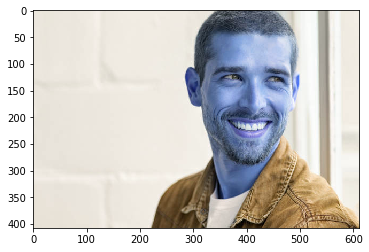

In [4]:
myimg = cv2.imread('C:/Users/hp/Desktop/study/3eme things/belmufti/c mail/22112021/happy-house-dataset/trytestinghpy.jpg')
imshow(myimg)

In [6]:
myimg.shape

(408, 612, 3)

In [38]:
reshapedimg = cv2.resize(myimg,(64,64),4)

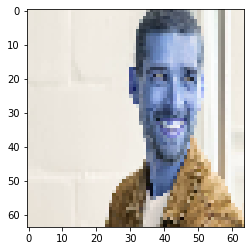

In [39]:
imshow(reshapedimg)

In [41]:
reshapedimg.shape

(64, 64, 3)

In [36]:
X = reshapedimg/255
X.shape

(64, 64, 3)

In [37]:
y = happy_model.predict(X)

ValueError: in user code:

    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (32, 64, 3)
